In [1]:
import pandas as pd

# Load the UX feedback data from the Excel file
feedback_df = pd.read_excel('UX Feedback data.xlsx')

In [3]:
# View the first few rows of the dataset
feedback_df.head()

,User ID,Timestamp,Source,Raw Feedback,Rating (1-5),Feature Affected
0,1,2024-11-10 14:35:00,Usability Test,"""I don’t like this update at all... it’s SO co...",2,Navigation
1,2,2024-11-10 15:10:00,User Survey,"""The new layout is decent, but the icons don’t...",3,Layout and Icons
2,3,2024-11-11 09:05:00,Online Review,"""Loving the app improvements! :) Easier to use!""",5,General Usability
3,4,2024-11-11 10:20:00,Customer Support,"""This app keeps crashing, especially in the mi...",1,App Stability
4,5,2024-11-11 12:45:00,Interview,"""I don't know why you changed the flow, feels ...",3,User Flow


In [5]:
# Check the data types and any missing values
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User ID           55 non-null     int64         
 1   Timestamp         55 non-null     datetime64[ns]
 2   Source            55 non-null     object        
 3   Raw Feedback      55 non-null     object        
 4   Rating (1-5)      55 non-null     int64         
 5   Feature Affected  55 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.7+ KB


In [7]:
# Checking for missing data
feedback_df.isnull().sum()

User ID             0
Timestamp           0
Source              0
Raw Feedback        0
Rating (1-5)        0
Feature Affected    0
dtype: int64

In [11]:
from textblob import TextBlob

In [13]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [15]:
feedback_df['Sentiment'] = feedback_df['Raw Feedback'].apply(get_sentiment)

In [19]:
feedback_df[['Raw Feedback', 'Sentiment']].head()

,Raw Feedback,Sentiment
0,"""I don’t like this update at all... it’s SO co...",-0.585938
1,"""The new layout is decent, but the icons don’t...",-0.076894
2,"""Loving the app improvements! :) Easier to use!""",0.687500
3,"""This app keeps crashing, especially in the mi...",-0.111979
4,"""I don't know why you changed the flow, feels ...",-0.500000


In [21]:
import matplotlib.pyplot as plt

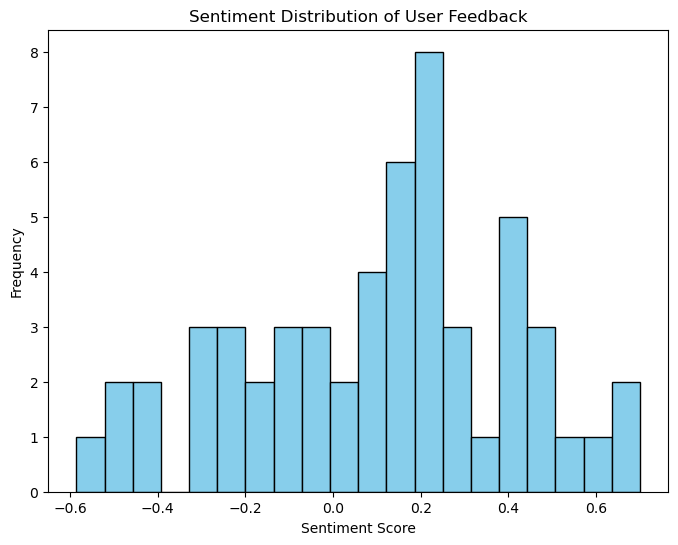

In [25]:
plt.figure(figsize=(8,6))
plt.hist(feedback_df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of User Feedback')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [29]:
feedback_df['Sentiment Category'] = feedback_df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

In [31]:
feedback_df[['Raw Feedback', 'Sentiment', 'Sentiment Category']].head()

,Raw Feedback,Sentiment,Sentiment Category
0,"""I don’t like this update at all... it’s SO co...",-0.585938,Negative
1,"""The new layout is decent, but the icons don’t...",-0.076894,Negative
2,"""Loving the app improvements! :) Easier to use!""",0.687500,Positive
3,"""This app keeps crashing, especially in the mi...",-0.111979,Negative
4,"""I don't know why you changed the flow, feels ...",-0.500000,Negative


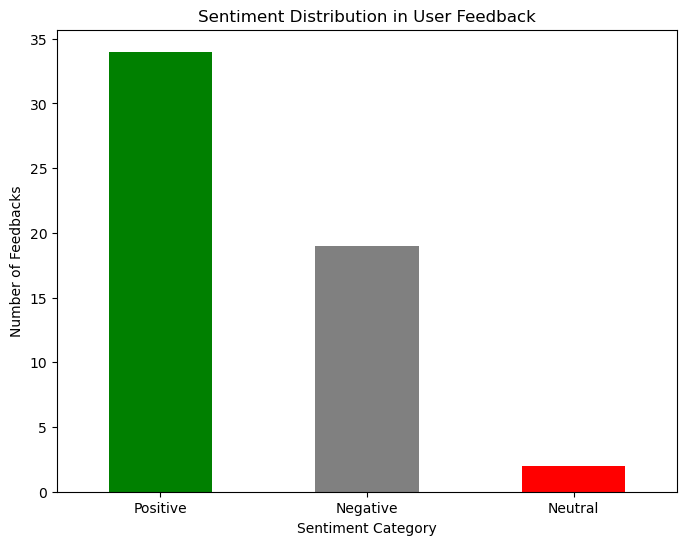

In [33]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = feedback_df['Sentiment Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])

# Adding title and labels
plt.title('Sentiment Distribution in User Feedback')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Feedbacks')
plt.xticks(rotation=0)

# Show the chart
plt.show()


In [35]:
# Filter for negative feedback
negative_feedback = feedback_df[feedback_df['Sentiment Category'] == 'Negative']

# Display the first few rows of negative feedback
negative_feedback[['Raw Feedback', 'Feature Affected']].head()

,Raw Feedback,Feature Affected
0,"""I don’t like this update at all... it’s SO co...",Navigation
1,"""The new layout is decent, but the icons don’t...",Layout and Icons
3,"""This app keeps crashing, especially in the mi...",App Stability
4,"""I don't know why you changed the flow, feels ...",User Flow
5,"""The color scheme looks too harsh and makes it...",Visual Design


In [37]:
# Grouping negative feedback by feature affected
negative_by_feature = negative_feedback.groupby('Feature Affected').size().reset_index(name='Count')

# Sorting to see the most common issues
negative_by_feature = negative_by_feature.sort_values(by='Count', ascending=False)

# Display the sorted result
negative_by_feature

,Feature Affected,Count
2,Layout and Icons,5
3,Navigation,4
0,App Stability,3
4,Payment Options,2
5,User Flow,2
6,Visual Design,2
1,General Usability,1


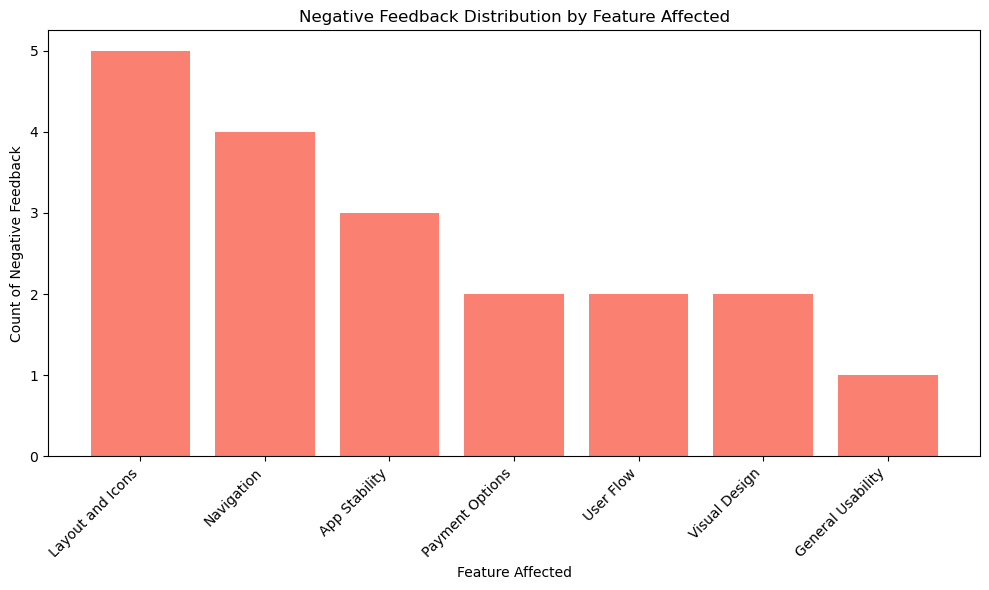

In [39]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(negative_by_feature['Feature Affected'], negative_by_feature['Count'], color='salmon')

# Add labels and title for clarity
plt.xlabel('Feature Affected')
plt.ylabel('Count of Negative Feedback')
plt.title('Negative Feedback Distribution by Feature Affected')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()

# Display the chart
plt.show()


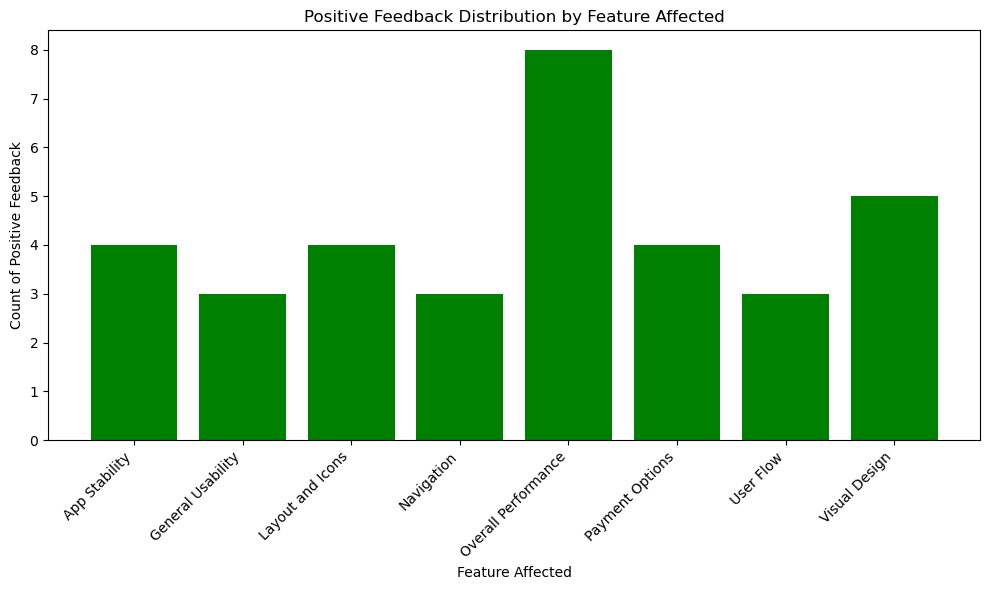

In [43]:
# Filter positive feedback data
positive_feedback = feedback_df[feedback_df['Sentiment Category'] == 'Positive']

# Group by Feature Affected to count the positive mentions for each feature
positive_by_feature = positive_feedback.groupby('Feature Affected').size().reset_index(name='Count')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(positive_by_feature['Feature Affected'], positive_by_feature['Count'], color='green')

# Add labels and title
plt.xlabel('Feature Affected')
plt.ylabel('Count of Positive Feedback')
plt.title('Positive Feedback Distribution by Feature Affected')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the chart
plt.show()


In [45]:
positive_by_feature

,Feature Affected,Count
0,App Stability,4
1,General Usability,3
2,Layout and Icons,4
3,Navigation,3
4,Overall Performance,8
5,Payment Options,4
6,User Flow,3
7,Visual Design,5


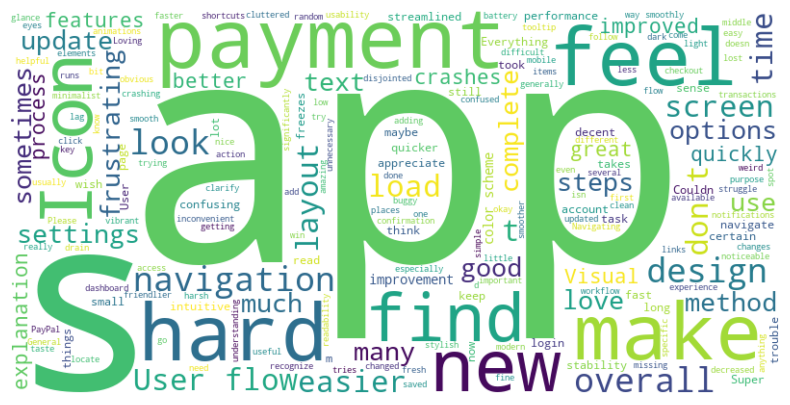

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all feedback into a single string for the word cloud
all_feedback = ' '.join(feedback_df['Raw Feedback'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_feedback)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [51]:
!pip install transformers
!pip install torch

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/10.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/10.0 MB 2.8 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/10.0 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.2/10.0 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.0 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/10.0 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/10.0 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 9.2/10.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.0 MB 4.3 MB/s eta 0:00:01
   ---------

In [53]:
from transformers import pipeline


In [55]:
# Load a pre-trained emotion detection model
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

C:\Users\PROBOOK 440 G5\anaconda\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PROBOOK 440 G5\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [57]:
# Apply emotion analysis to the raw feedback
feedback_df['Emotion'] = feedback_df['Raw Feedback'].apply(lambda x: emotion_analyzer(x)[0]['label'])

# Display results
feedback_df[['Raw Feedback', 'Emotion']].head()


,Raw Feedback,Emotion
0,"""I don’t like this update at all... it’s SO co...",disgust
1,"""The new layout is decent, but the icons don’t...",sadness
2,"""Loving the app improvements! :) Easier to use!""",joy
3,"""This app keeps crashing, especially in the mi...",sadness
4,"""I don't know why you changed the flow, feels ...",disgust


C:\Users\PROBOOK 440 G5\AppData\Local\Temp\ipykernel_17340\3394295586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feedback_df, x='Emotion', palette='Set2')


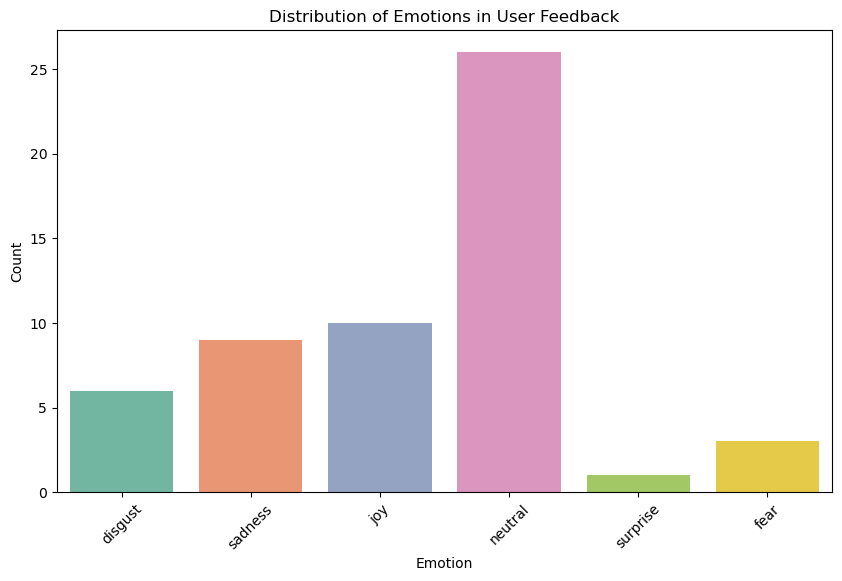

In [63]:
# Visualize the distribution of emotions
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=feedback_df, x='Emotion', palette='Set2')
plt.title('Distribution of Emotions in User Feedback')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Apply emotion analysis to each feedback entry
feedback_df['Emotion'] = feedback_df['Raw Feedback'].apply(lambda x: emotion_analyzer(x)[0]['label'])

# Count the occurrences of each emotion
emotion_counts = feedback_df['Emotion'].value_counts()

# Display the emotion counts
print(emotion_counts)


Emotion
neutral     26
joy         10
sadness      9
disgust      6
fear         3
surprise     1
Name: count, dtype: int64


In [75]:
# Combine Sentiment and Emotion
feedback_df['Sentiment_Emotion'] = feedback_df['Sentiment Category'] + ' - ' + feedback_df['Emotion']

# Check the result
feedback_df[['Raw Feedback', 'Sentiment Category', 'Emotion', 'Sentiment_Emotion']].head()

,Raw Feedback,Sentiment Category,Emotion,Sentiment_Emotion
0,"""I don’t like this update at all... it’s SO co...",Negative,disgust,Negative - disgust
1,"""The new layout is decent, but the icons don’t...",Negative,sadness,Negative - sadness
2,"""Loving the app improvements! :) Easier to use!""",Positive,joy,Positive - joy
3,"""This app keeps crashing, especially in the mi...",Negative,sadness,Negative - sadness
4,"""I don't know why you changed the flow, feels ...",Negative,disgust,Negative - disgust


C:\Users\PROBOOK 440 G5\AppData\Local\Temp\ipykernel_17340\375100545.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sentiment_Emotion', data=feedback_df, palette='coolwarm')


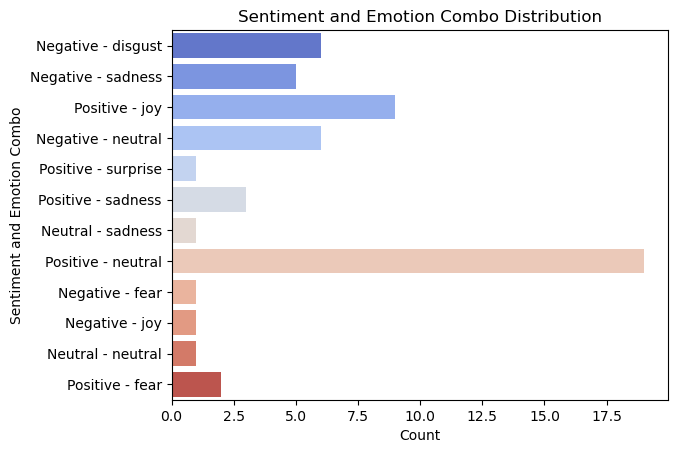

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of sentiment-emotion combinations
sns.countplot(y='Sentiment_Emotion', data=feedback_df, palette='coolwarm')
plt.title('Sentiment and Emotion Combo Distribution')
plt.xlabel('Count')
plt.ylabel('Sentiment and Emotion Combo')
plt.show()
